In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [7]:
# Step 2: Load the Titanic dataset
df = pd.read_csv('C:\\Users\\Acer\\Documents\\BDA3.3\\Machine learning Assignment\\titanic.csv')

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Step 3: Perform Exploratory Data Analysis (EDA)

# View the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# View data types of each column
print("\nData types:\n", df.dtypes)

# Check for missing values in each column
print("\nMissing values:\n", df.isnull().sum())

# Basic statistical summary of numerical features
df.describe()

Shape of the dataset: (891, 12)

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


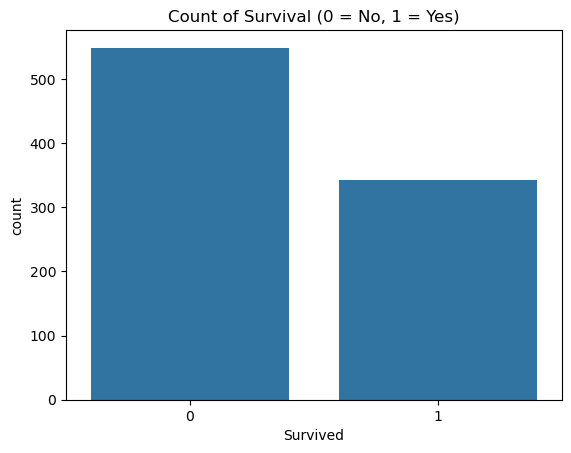

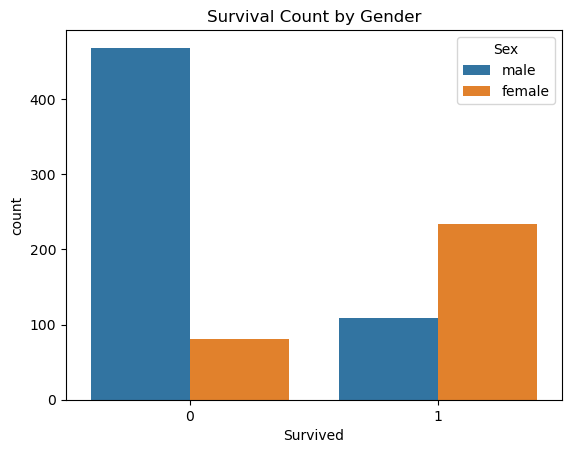

In [9]:
# Visualize survival count
sns.countplot(x='Survived', data=df)
plt.title('Count of Survival (0 = No, 1 = Yes)')
plt.show()

# Visualize survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

In [10]:
# Step 4: Data Preprocessing

# Fill missing values in 'Age' with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant or non-useful columns
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Convert categorical variables into numerical variables using one-hot encoding
# 'drop_first=True' avoids dummy variable trap
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the cleaned dataset
df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_32052\2690009920.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_32052\2690009920.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [11]:
# Step 5: Define features (X) and target (y)

# Features are all columns except 'Survived'
X = df.drop('Survived', axis=1)

# Target variable is 'Survived'
y = df['Survived']

In [12]:
# Step 6: Split the dataset into training and testing sets

# 80% training and 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of train and test sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (712, 8)
Testing set size: (179, 8)


In [13]:
# Step 7: Train the Machine Learning Model

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Step 8: Make predictions on the test data

y_pred = model.predict(X_test)

In [15]:
# Step 9: Evaluate the model

# Calculate and print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


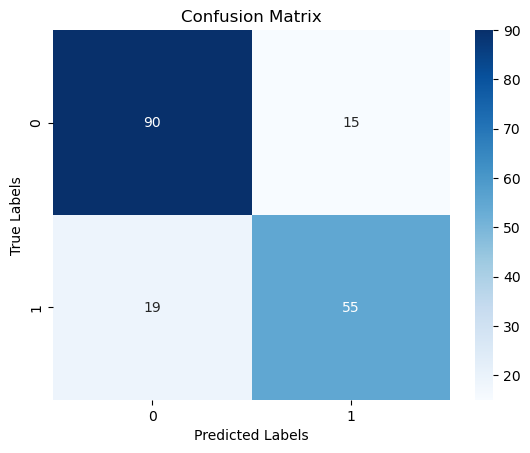

In [16]:
# Step 10: Plot the Confusion Matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

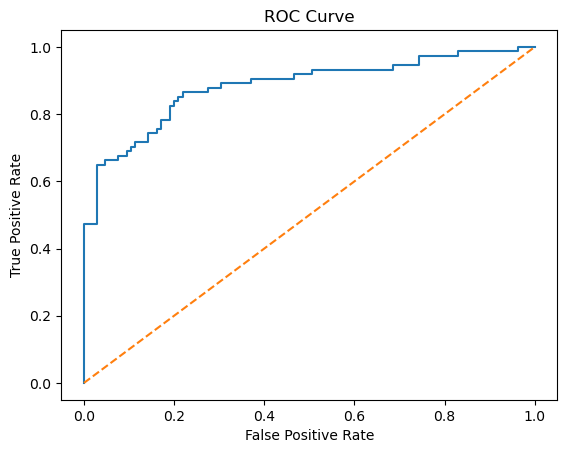

ROC AUC Score: 0.8826254826254826


In [17]:
# Step 11: Plot the ROC Curve

# Get predicted probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC Curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Reference line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))